# XAS broadening test

Broadening equation:
Gaussian function: $G(x ; \sigma) \equiv \frac{e^{-x^{2} /\left(2 \sigma^{2}\right)}}{\sigma \sqrt{2 \pi}}$ ,

Lorentzian function: $L(x ; \Gamma) \equiv \frac{\frac{1}{2}\Gamma}{\pi\left(x^{2}+(\frac{1}{2}\Gamma)^{2}\right)}$,

Voigt function: $V(x ; \sigma, \Gamma) \equiv \int_{-\infty}^{\infty} G\left(x^{\prime} ; \sigma\right) L\left(x-x^{\prime} ; \Gamma\right) d x^{\prime}$ ,



Energy dependent function: using energy dependent Gamma value $\Gamma\left(E\right)=\Gamma_0+\alpha\ (E-E_f)$ in Voigt function. In this script, the broadening parameter sigma $\sigma$ and lorentz divider $\frac{1}{\alpha}$ are optimized comparaing to exprimental spectrum.


Hebert, C., Practical aspects of running the WIEN2k code for electron spectroscopy. Micron, 2007. 38(1): p. 12-28.




In [18]:

%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

from broaden import *


## 0. Using manual parameters to broaden the XAS simulation

In [17]:
# Collect exprimental and simulation data

# Anatase TiO2 experimental data is derived from Yan, D., Topsakal, M., Selcuk, S., Lyons, J. L., Zhang, W., Wu, Q., ... & Liu, M. (2019). Ultrathin amorphous titania on nanowires: Optimization of conformal growth and elucidation of atomic-scale motifs. Nano letters, 19(6), 3457-3463.
exp= np.fromfile(open('anatase_exp.npz','rb')).reshape(-1,2) 

# Anatase TiO2 theoretical simulation is calculated by VASP
unbroaden_spect = np.loadtxt('ana.txt')

plt.plot(exp.T[0],exp.T[1], label = 'Anatase EXP')
plt.legend()
plt.show()


plt.plot(unbroaden_spect.T[0],unbroaden_spect.T[1], label = 'Anatase unbroaden simulation')
plt.legend()
plt.show()


# choosing smaller range can make the optimization processs faster
xin = unbroaden_spect.T[0][20000:35000] 
yin = unbroaden_spect.T[1][20000:35000]
plt.plot(xin,yin,label = 'Zoom in unbroaden simulation')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'anatase_exp.npz'

In [3]:
# Output energy grid
x=np.linspace(4950,5010, 1000, endpoint=True)


#Create site spectrum object for broadening
ana = SiteSpectum(xin,yin, weight = 1.0)


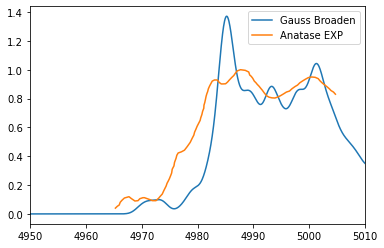

In [4]:
spect= gauss_broaden(x,ana.spectrum[0],ana.spectrum[1] ,sigma = 1.0,shift=100)

factor =6*10e4

plt.plot(x, spect * factor, label = 'Gauss Broaden')

plt.plot(exp.T[0],exp.T[1], label = 'Anatase EXP')

plt.xlim(4950,5010)
plt.legend()
plt.show()

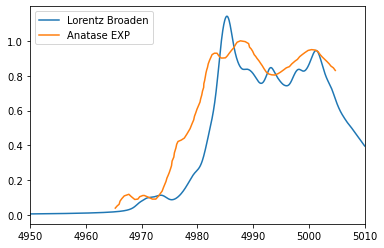

In [5]:
spect= lorentz_broaden(x,ana.spectrum[0],ana.spectrum[1] ,gamma = 1.0,shift= 100)

factor =6*10e4

plt.plot(x, spect * factor, label = 'Lorentz Broaden')

plt.plot(exp.T[0],exp.T[1], label = 'Anatase EXP')

plt.xlim(4950,5010)
plt.legend()
plt.show()

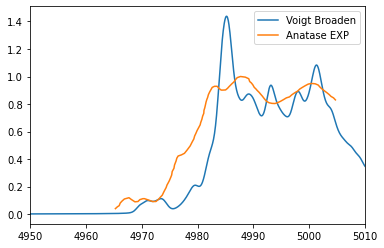

In [6]:
spect= voigt_broaden(x,ana.spectrum[0],ana.spectrum[1],sigma = 0.5,gamma = 0.5,shift= 100)

factor =6*10e4

plt.plot(x, spect * factor, label = 'Voigt Broaden')

plt.plot(exp.T[0],exp.T[1], label = 'Anatase EXP')

plt.xlim(4950,5010)
plt.legend()
plt.show()

## 1. Collect XAS simulation and exprimental information for broadening parameters optimization

In [7]:
# Collect XAS sumulation information     
TiK_core_state =  -4864.0371       
TiK_core_hole_lifetime = 0.89

Ana_core_hole_fermi_energy = 5.1302


           
Fermi = Ana_core_hole_fermi_energy - TiK_core_state 


# Enter the information to site spectrum object
ana = SiteSpectum(xin,yin, fermi = Fermi , weight = 1.0)



## 2. Creat Zn K-edge broaden object and test broaden code

In [13]:
# Creat Zn K-edge broaden object and test broaden code


brd = Broaden(sigma = 0.2,
              lorentz_divider= 40,
            CHlifetime = TiK_core_hole_lifetime,
             shift = 100)

spect=brd.broaden(x,[ana])


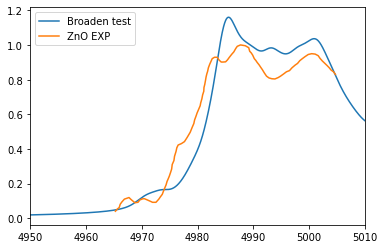

In [14]:
factor = 150

plt.plot(x, spect * factor, label = 'Broaden test')

plt.plot(exp.T[0],exp.T[1], label = 'ZnO EXP')
plt.xlim(4950,5010)
plt.legend()
plt.show()

## 3.Using simplicial homology global optimization to optimize broadening parameters


In [15]:

bds=[(0.1,2),(1,50),(95,105)]

brd.paras_optimize(exp.T[0],[ana] ,exp.T[1],bounds=bds, dmu=True, opt_shift = True)


     fun: -0.6717967993461658
    funl: array([-0.6717968])
 message: 'Optimization terminated successfully.'
    nfev: 126
     nit: 2
   nlfev: 117
   nlhev: 0
   nljev: 26
 success: True
       x: array([ 0.1       , 47.70594155, 97.44760473])
      xl: array([[ 0.1       , 47.70594155, 97.44760473]])

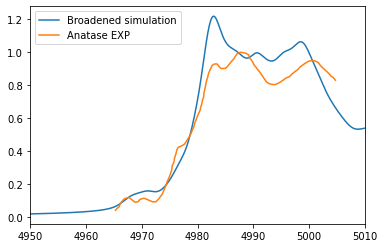

In [16]:
spect=brd.broaden(x,[ana])

factor = 150

plt.plot(x, spect * factor, label = 'Broadened simulation')

plt.plot(exp.T[0],exp.T[1], label = 'Anatase EXP')

plt.xlim(4950,5010)
plt.legend()
plt.show()